# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
#TEST URL C/ FORMATTING - SPECIFIC EXAMPLE
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
city_url = "london"

response = requests.get(url + city_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 6},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1689209457,
 'id': 2643743,
 'main': {'feels_like': 14.72,
          'humidity': 82,
          'pressure': 1013,
          'temp': 15.02,
          'temp_max': 16.19,
          'temp_min': 12.85},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1689220680,
         'sunset': 1689279239,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 250, 'speed': 4.63}}


In [28]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paramonga
Processing Record 2 of Set 1 | morondava
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | mingyue
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | qarawul
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | bubaque
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | 'amran
City not found. Skipping...
Processing Record 15 of Set 1 | lata
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | shache
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | donghai
Processing Record 21 of Set 1 | klaksvik
Proc

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,paramonga,-10.6667,-77.8333,20.15,84,62,5.24,PE,1689209740
1,morondava,-20.2833,44.2833,20.51,61,0,6.09,MG,1689209740
2,bilibino,68.0546,166.4372,22.28,36,0,3.10,RU,1689209740
3,mingyue,43.1069,128.9217,24.87,59,100,1.31,CN,1689209740
4,ilulissat,69.2167,-51.1000,9.01,76,20,1.54,GL,1689209740


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paramonga,-10.6667,-77.8333,20.15,84,62,5.24,PE,1689209740
1,morondava,-20.2833,44.2833,20.51,61,0,6.09,MG,1689209740
2,bilibino,68.0546,166.4372,22.28,36,0,3.10,RU,1689209740
3,mingyue,43.1069,128.9217,24.87,59,100,1.31,CN,1689209740
4,ilulissat,69.2167,-51.1000,9.01,76,20,1.54,GL,1689209740


In [33]:
#CONVERTING DATE TO READABLE DATE
time_test = city_data_df["Date"]
time_list = []
for value in time_test:
    #REFERENCED STACKOVERFLOW #3682748
    new = datetime.utcfromtimestamp(value).strftime('%Y-%m-%d %H:%M:%S')
    time_list.append(new)
    
readable_date = time_list[0].split(" ")
pretty_date = readable_date[0]
pretty_date

'2023-07-13'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

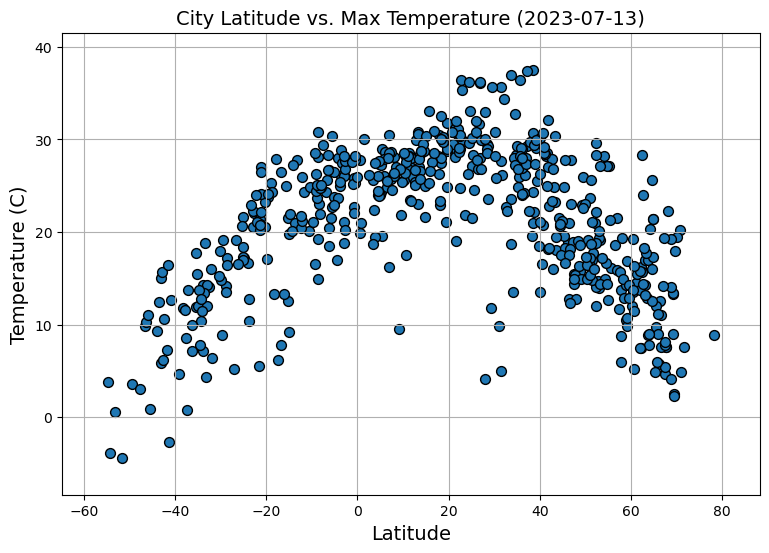

In [34]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Latitude vs. Max Temperature ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-4),(max(y_values)+4))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

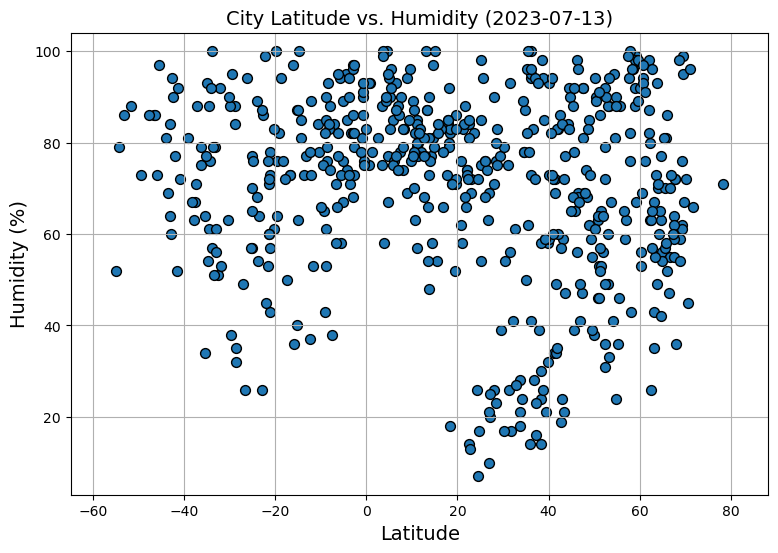

In [35]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Latitude vs. Humidity ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-4),(max(y_values)+4))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

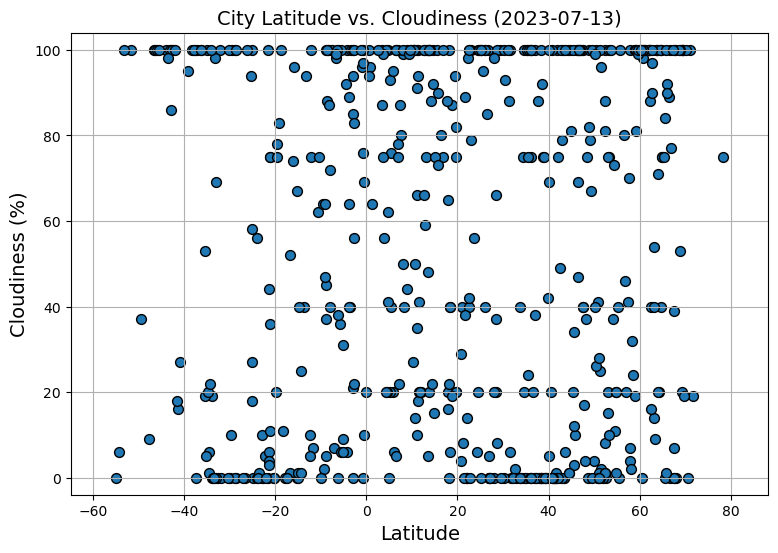

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Latitude vs. Cloudiness ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-4),(max(y_values)+4))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

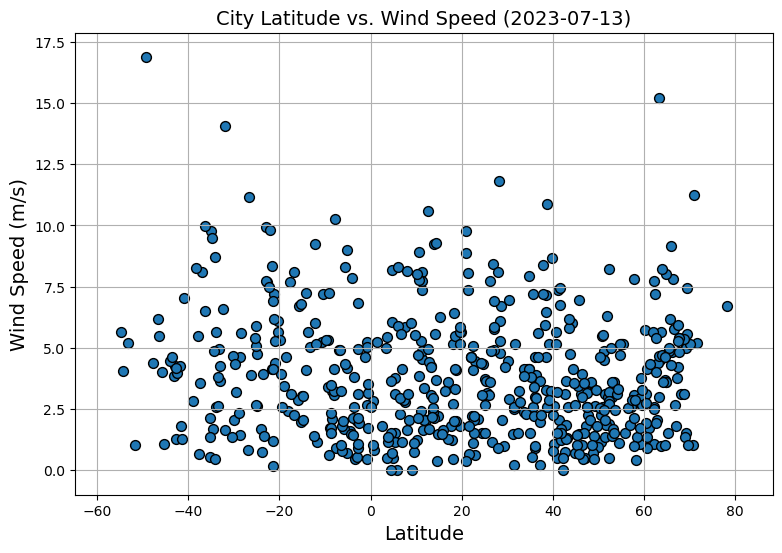

In [37]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Latitude vs. Wind Speed ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-1),(max(y_values)+1))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,22.28,36,0,3.10,RU,1689209740
3,mingyue,43.1069,128.9217,24.87,59,100,1.31,CN,1689209740
4,ilulissat,69.2167,-51.1000,9.01,76,20,1.54,GL,1689209740
5,qarawul,37.2202,68.7804,29.26,16,0,0.22,AF,1689209741
7,bubaque,11.2833,-15.8333,27.10,80,100,4.53,GW,1689209741


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,paramonga,-10.6667,-77.8333,20.15,84,62,5.24,PE,1689209740
1,morondava,-20.2833,44.2833,20.51,61,0,6.09,MG,1689209740
6,west island,-12.1568,96.8225,25.99,89,75,9.26,CC,1689209741
9,port elizabeth,-33.9180,25.5701,7.16,100,0,2.57,ZA,1689209741
10,blackmans bay,-43.0167,147.3167,15.07,64,100,4.27,AU,1689209741


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6587025933046141


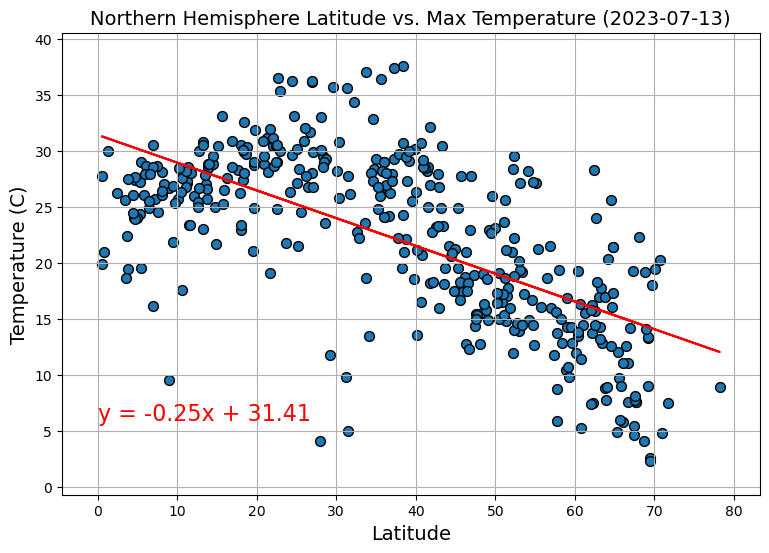

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(0,6),fontsize=16, color="red")
plt.title(f"Northern Hemisphere Latitude vs. Max Temperature ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.8100446610348494


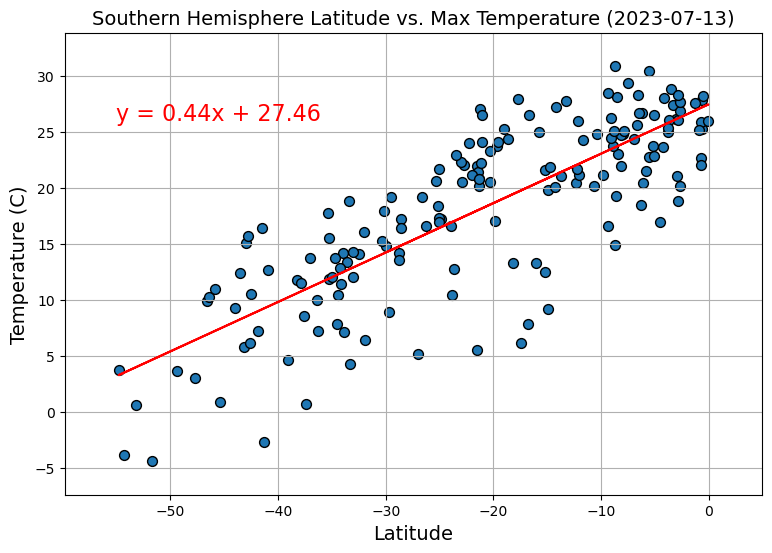

In [41]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(-55,26),fontsize=16, color="red")
plt.title(f"Southern Hemisphere Latitude vs. Max Temperature ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Temperature (C)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere showed a moderate negative correlation between latitude and temperature with an r-value of -0.66, while the southern hemisphere showed a strong positive correlation with an r-value of 0.81.  This indicates that the maximum temerature increases when approaching the equator and decreases when moving away from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.14850157636233965


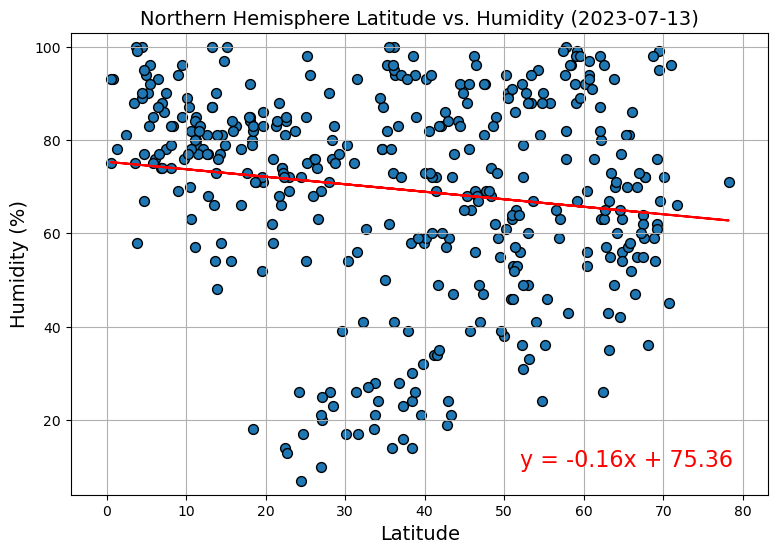

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(52,10),fontsize=16, color="red")
plt.title(f"Northern Hemisphere Latitude vs. Humidity ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.1167372936358863


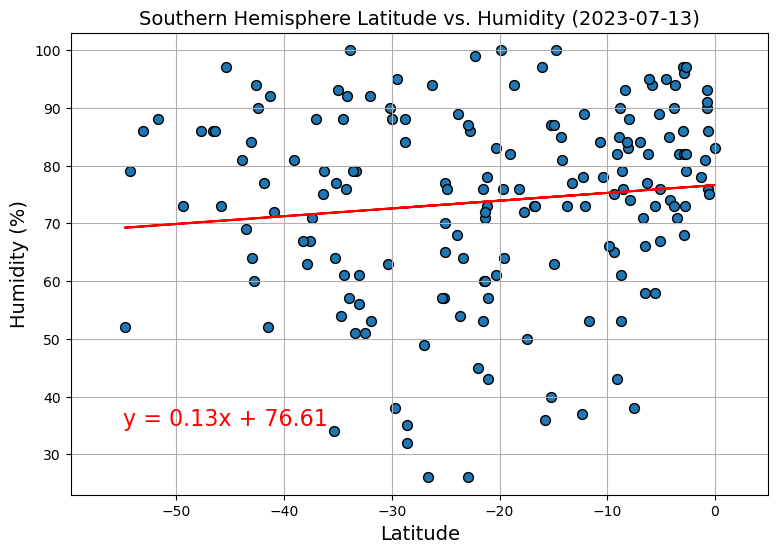

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(-55,35),fontsize=16, color="red")
plt.title(f"Southern Hemisphere Latitude vs. Humidity ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemispheres showed a possible very weak corrleation between latitude and humidity, with r-values of -0.15 and 0.12, respectively. Latitude may have little effect on humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.037891256642371134


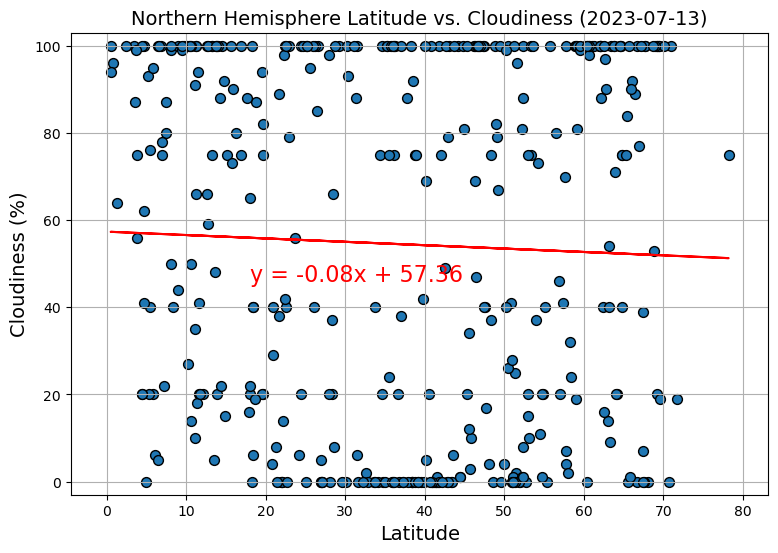

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(18,46),fontsize=16, color="red")
plt.title(f"Northern Hemisphere Latitude vs. Cloudiness ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.015751917688373213


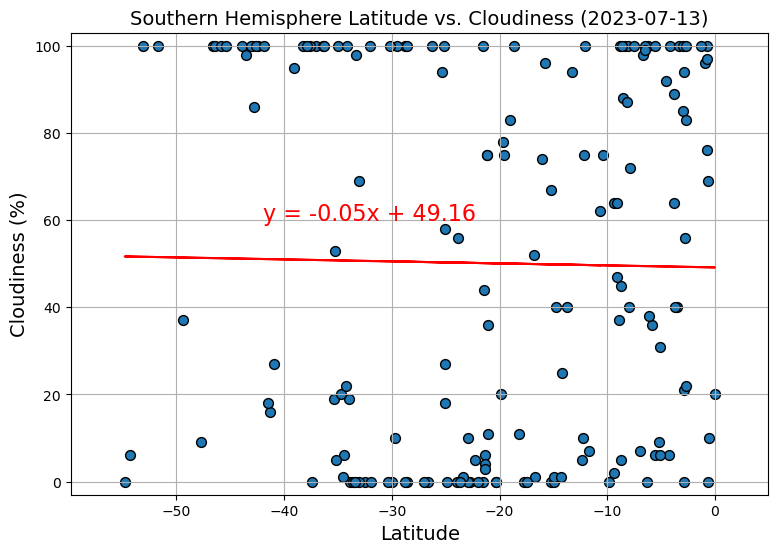

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(-42,60),fontsize=16, color="red")
plt.title(f"Southern Hemisphere Latitude vs. Cloudiness ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The northern and southern hemispheres both showed no correlation between latitude and cloudiness with r-values of -0.04 and -0.02, respectively.  Latitude appears to have little to no effect on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02654661973023387


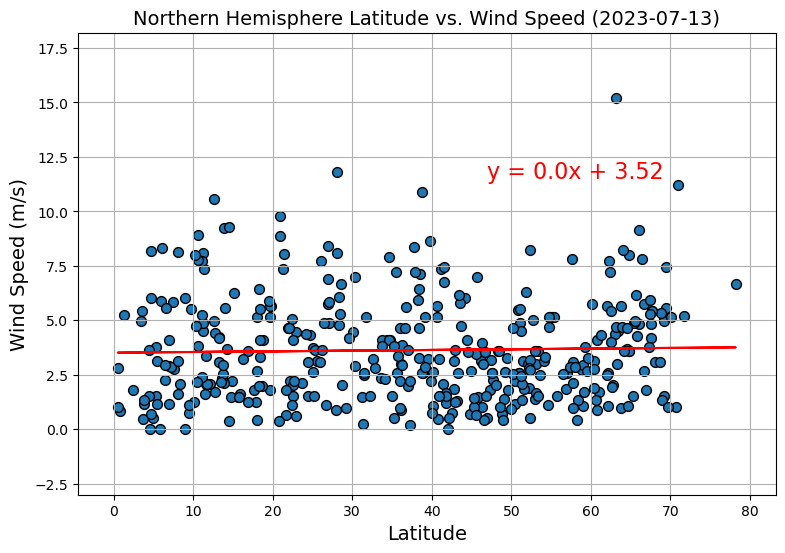

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(47,11.5),fontsize=16, color="red")
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.19076151531812693


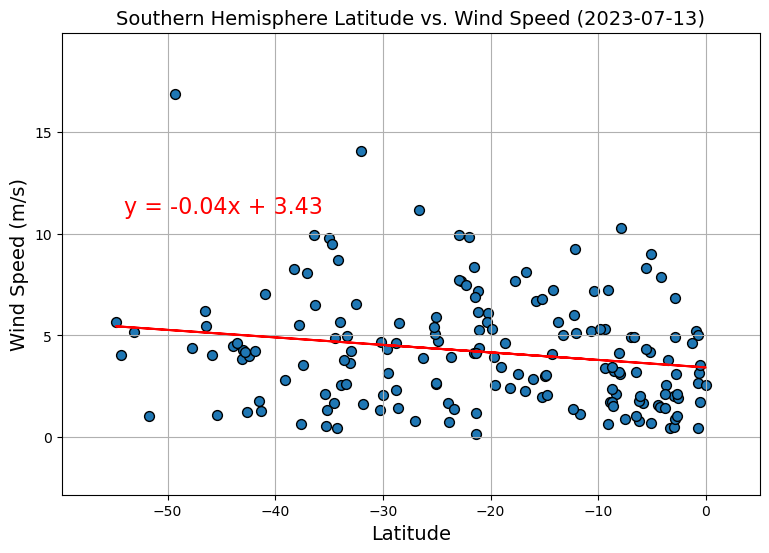

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_line = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.plot(x_values, regress_line, "r-")
plt.annotate(line_eq,(-54,11),fontsize=16, color="red")
plt.title(f"Southern Hemisphere Latitude vs. Wind Speed ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.xlim((min(x_values)-5),(max(x_values)+5))
plt.ylim((min(y_values)-3),(max(y_values)+3))
plt.grid(True)
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere showed no correlation between latitude and wind speed with an r-value of 0.02, while the southern hemisphere showed a possible very weak negative correlation with an r-value of -0.19. Latitude appears to have little effect on wind speed.